In [24]:
from simba import *
from simba.core import j_matrix
from sympy import symbols, simplify, init_printing, Matrix, MatrixSymbol, linsolve
init_printing()

The unstable filter transfer function is given by,

$$
G(s) = \frac{s - 2}{s + 2}
$$

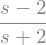

In [6]:
s = symbols('s')
tf = (s - 2) / (s + 2)
tf

In [17]:
ss = transfer_function_to_state_space(tf).extended_to_quantum()
a, b, c, d = ss
ss

Matrix([
[2, 0],
[0, 2]])
Matrix([
[1, 0],
[0, 1]])
Matrix([
[4, 0],
[0, 4]])
Matrix([
[1, 0],
[0, 1]])

In [18]:
j = j_matrix(2)

In [22]:
x = MatrixSymbol('X', *j.shape)

In [73]:
def solve_matrix_eqn(eqn, x):
    """
    Solve matrix eqn for x, where eqn is a matrix equation (assumed equal to zero on RHS) and x is a sympy ``MatrixSymbol`` object.
    
    Transforms all solutions to list of matrices (same shape as x).
    """
    from sympy import linsolve
    sols = linsolve(list(eqn), list(x))
    return list(map(lambda sol: Matrix(sol).reshape(*x.shape), sols))

In [74]:
list(a * x + x * a.H + b * j * b.H)

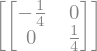

In [75]:
solve_matrix_eqn(a * x + x * a.H + b * j * b.H, x)